In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np
from scipy.stats import spearmanr
import pandas as pd
from exp.DFRdatasets.fig_utils import sum_all_container_by_filenames, plot_figs

In [38]:
gnd_truth_rank = np.zeros((40,))
for i in range(0, 20, 4):
    gnd_truth_rank[i:(i+4)] = (20 - i)

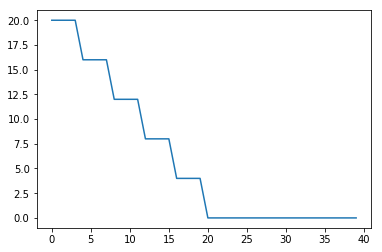

In [39]:
plt.plot(gnd_truth_rank)

## More Interaction

In [73]:
gnd_truth_rank = np.zeros((60,))
for i in range(0, 30, 3):
    gnd_truth_rank[i:(i + 3)] = (30 - i)

def create_df(from_features=0, top_features=60):
    arr = []
    methods = [
        'nn_rank:0.01', 'nn_rank:0.05', 'nn_rank:0.1', 'nn_rank:0.5', 'nn_rank:1', 
        'rf_rank', 'enet_rank', 'zero_rank', 'shuffle_rank'
    ]
    for method in methods:
        _, ranks = torch.load('../results/MoreInteractionSimulation/0111-%s-nn_test_zero.pth' % method)
        arr.append([spearmanr(gnd_truth_rank[from_features:top_features], 
                              ranks[i][from_features:top_features]).correlation for i in range(5)])
    df = pd.DataFrame(arr)
    df.index = methods
    df['mean_corr'] = (df[0] + df[1] + df[2] + df[3] + df[4]) / 5
    return df

In [80]:
df_60 = create_df(top_features=60)
df_30 = create_df(top_features=30)
df_20 = create_df(top_features=20)
df_15 = create_df(top_features=15)
df_5 = create_df(top_features=5)
df_20_60 = create_df(from_features=20, top_features=60)

df_60['30_corr'] = df_30['mean_corr']
df_60['20_corr'] = df_20['mean_corr']
df_60['15_corr'] = df_15['mean_corr']
df_60['5_corr'] = df_5['mean_corr']
df_60['20_60_corr'] = df_20_60['mean_corr']

In [81]:
df_60

,0,1,2,3,4,mean_corr,30_corr,20_corr,15_corr,5_corr,20_60_corr
nn_rank:0.01,0.927386,0.915527,0.917756,0.923820,0.897784,0.916455,0.982401,0.961409,0.914333,0.866025,0.689433
nn_rank:0.05,0.926673,0.919094,0.919540,0.926138,0.919272,0.922143,0.976770,0.965053,0.931790,0.866025,0.714400
nn_rank:0.1,0.927654,0.919361,0.916954,0.925246,0.919183,0.921680,0.967116,0.946836,0.903422,0.866025,0.717808
nn_rank:0.5,0.925870,0.913655,0.894752,0.922750,0.918559,0.915117,0.942177,0.922243,0.899058,0.866025,0.703880
nn_rank:1,0.924533,0.923552,0.901440,0.926673,0.916330,0.918505,0.940836,0.895828,0.840139,0.866025,0.718845
rf_rank,0.844999,0.882359,0.852222,0.876741,0.845088,0.860282,0.597324,0.562302,0.453893,0.808290,0.660837
enet_rank,0.243889,0.216452,0.283059,0.297211,0.143002,0.236722,0.183937,0.212094,0.232605,0.115470,0.161143
zero_rank,0.931755,0.919629,0.927743,0.930596,0.923641,0.926673,0.978378,0.966875,0.955794,0.866025,0.732921
shuffle_rank,0.930418,0.915527,0.914992,0.927386,0.923285,0.922322,0.960144,0.933173,0.901240,0.866025,0.724475


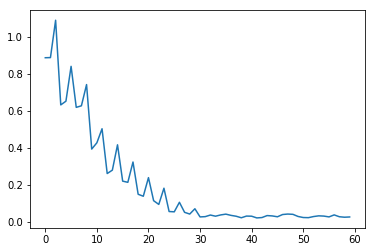

In [84]:
_, ranks = torch.load('../results/MoreInteractionSimulation/0111-%s-nn_test_zero.pth' % 'zero_rank')
plt.plot(ranks[0])

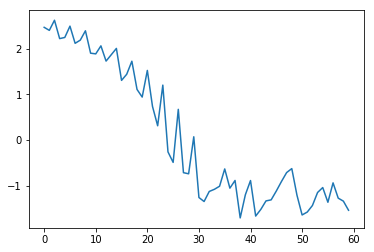

In [85]:
_, ranks = torch.load('../results/MoreInteractionSimulation/0111-%s-nn_test_zero.pth' % 'nn_rank:0.05')
plt.plot(ranks[0])

## Nointeraction

In [324]:
gnd_truth_rank = np.zeros((40,))
for i in range(0, 20):
    gnd_truth_rank[i:(i+1)] = (20 - i)

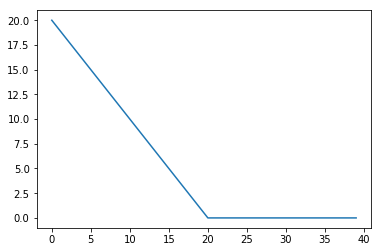

In [325]:
plt.plot(gnd_truth_rank)

In [326]:
def create_df(top_features=40):
    arr = []
    methods = [
#         'nn_rank:0.05', 'nn_rank:0.1', 'nn_rank:0.5', 
        'nn_rank:0.1',  
        'nn_rank:1',  
         
#         'nn_middle_rank:0.001','nn_middle_rank:0.01', 'nn_middle_rank:0.1', 'nn_middle_rank:0.5', 'nn_middle_rank:1',
        'rf_rank', 
        'enet_rank', 'lasso_rank', 'zero_rank', 'shuffle_rank','dfs_rank:0.1', 'marginal_rank'
    ]
    for method in methods:
        _, ranks = torch.load('../results/NoInteractionSimulation/0111-%s-nn_test_zero.pth' % method)
        arr.append([spearmanr(gnd_truth_rank[:top_features], ranks[i][:top_features]).correlation for i in range(5)])
    df = pd.DataFrame(arr)
    df.index = methods
    df['mean_corr'] = (df[0] + df[1] + df[2] + df[3] + df[4]) / 5
    df['std_corr'] = df[[0, 1, 2, 3, 4]].std(axis=1)
#     df['mean_corr'] = (df[0]) / 5
    return df

In [327]:
# df['std_corr'] = df[[0, 1, 2, 3, 4]].std(axis=1)
df_40 = create_df(top_features=40)
df_20 = create_df(top_features=20)
df_15 = create_df(top_features=15)
df_10 = create_df(top_features=10)
df_5 = create_df(top_features=5)

df_40['20_corr'] = df_20['mean_corr']
df_40['20_corr_std'] = df_20['std_corr']
df_40['15_corr'] = df_15['mean_corr']
df_40['15_corr_std'] = df_15['std_corr']
df_40['10_corr'] = df_10['mean_corr']
df_40['10_corr_std'] = df_10['std_corr']
df_40['5_corr'] = df_5['mean_corr']
df_40['5_corr_std'] = df_5['std_corr']

In [328]:
df_40

,0,1,2,3,4,mean_corr,std_corr,20_corr,20_corr_std,15_corr,15_corr_std,10_corr,10_corr_std,5_corr,5_corr_std
nn_rank:0.1,0.935139,0.935339,0.926315,0.935540,0.933233,0.933113,0.003911,0.997594,0.002281,0.995000,5.416340e-03,0.985455,1.327812e-02,0.92,0.083666
nn_rank:1,0.935139,0.935339,0.920399,0.935339,0.930927,0.931429,0.006447,0.997594,0.000824,0.994286,1.956152e-03,0.980606,6.639061e-03,0.86,0.054772
rf_rank,0.928220,0.933233,0.920198,0.894127,0.928019,0.920760,0.015601,0.996090,0.001715,0.992143,2.988072e-03,0.973333,1.014133e-02,0.86,0.054772
enet_rank,0.053296,0.614785,0.294271,-0.109579,0.294573,0.229469,0.275181,0.996917,0.001201,0.992677,2.855307e-03,0.975128,9.721375e-03,0.86,0.054772
lasso_rank,0.053296,0.214591,0.133705,-0.109579,0.214389,0.101280,0.135507,0.996917,0.001201,0.992677,2.855307e-03,0.975128,9.721375e-03,0.86,0.054772
zero_rank,0.935339,0.934938,0.933233,0.931128,0.907764,0.928481,0.011699,0.997594,0.001345,0.995000,1.956152e-03,0.983030,6.639061e-03,0.86,0.054772
shuffle_rank,0.935139,0.934938,0.920399,0.935139,0.928821,0.930887,0.006458,0.996692,0.000673,0.992857,1.241267e-16,0.975758,1.241267e-16,0.82,0.044721
dfs_rank:0.1,0.903052,0.905959,0.891821,0.924008,0.885805,0.902129,0.014722,0.978947,0.011983,0.975714,1.195229e-02,0.934545,3.890135e-02,0.78,0.130384
marginal_rank,0.926114,0.899341,0.894729,0.892824,0.899141,0.902430,0.013536,0.995188,0.001258,0.990714,4.072055e-03,0.970909,1.382031e-02,0.86,0.054772


In [329]:
df_40.to_csv('no_inter.csv')

## Corr no interaction

In [272]:
gnd_truth_rank = np.zeros((40,))
for i in range(0, 20):
    gnd_truth_rank[i:(i+1)] = (20 - i)

def create_df(top_features=40):
    arr = []
    methods = [
        'nn_rank:0.1', 'nn_rank:0.5',
         'nn_rank:1',
        'dfs_rank:1',
#         'nn_middle_rank:0.001','nn_middle_rank:0.01', 'nn_middle_rank:0.1', 'nn_middle_rank:0.5', 'nn_middle_rank:1',
        'rf_rank', 
        'enet_rank', 'lasso_rank', 
        'zero_rank', 'shuffle_rank', 'random_rank'
    ]
    for method in methods:
        _, ranks = torch.load('../results/CorrelatedNoInteractionSimulation/0111-%s-nn_test_zero.pth' % method)
        arr.append([spearmanr(gnd_truth_rank[:top_features], ranks[i][:top_features]).correlation for i in range(1)])
    df = pd.DataFrame(arr)
    df.index = methods
#     df['mean_corr'] = (df[0] + df[1] + df[2] + df[3] + df[4]) / 5
    df['mean_corr'] = (df[0]) / 1
    return df

df_40 = create_df(top_features=40)
df_20 = create_df(top_features=20)
df_10 = create_df(top_features=10)
df_5 = create_df(top_features=5)

df_40['20_corr'] = df_20['mean_corr']
df_40['10_corr'] = df_10['mean_corr']
df_40['5_corr'] = df_5['mean_corr']

In [275]:
df_40.to_csv('corr_no_interac.csv')

In [276]:
df_40

,0,mean_corr,20_corr,10_corr,5_corr
nn_rank:0.1,0.932231,0.932231,0.990977,0.951515,0.700000
nn_rank:0.5,0.932231,0.932231,0.990977,0.939394,0.700000
nn_rank:1,0.933033,0.933033,0.996992,0.987879,1.000000
dfs_rank:1,0.923808,0.923808,0.990977,0.975758,1.000000
rf_rank,0.921301,0.921301,0.987970,0.903030,0.700000
enet_rank,0.290061,0.290061,0.988326,0.917032,0.447214
lasso_rank,-0.110095,-0.110095,0.993607,0.948333,0.666886
zero_rank,0.933033,0.933033,0.996992,0.987879,1.000000
shuffle_rank,0.933233,0.933233,0.998496,1.000000,1.000000
random_rank,0.183699,0.183699,0.049624,0.272727,-0.100000


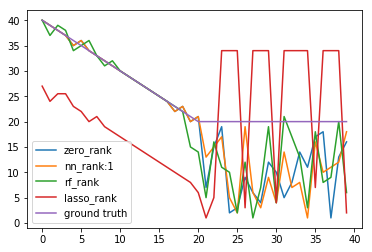

In [274]:
from scipy.stats import rankdata

methods = ['zero_rank', 'nn_rank:1', 'rf_rank', 'lasso_rank']
for method in methods:
    _, ranks = torch.load('../results/CorrelatedNoInteractionSimulation/0111-%s-nn_test_zero.pth' % method)
    plt.plot(rankdata(ranks[0]), label=method)
plt.plot(gnd_truth_rank + 20, label='ground truth')
plt.legend()

## Corr interaction

In [287]:
gnd_truth_rank = np.zeros((40,))
for i in range(0, 20, 2):
    gnd_truth_rank[i:(i+2)] = (20 - i)

In [306]:
def create_df(top_features=40):
    arr = []
    methods = [
#         'nn_rank:0.01', 'nn_rank:0.5', 'nn_rank:1', 
        'nn_rank:0.1', 
        'nn_rank:0.5', 
        'nn_rank:1', 
        'nn_rank:5', 
        'nn_rank:2', 
        'nn_rank:3', 
#         'nn_middle_rank:0.001','nn_middle_rank:0.01', 'nn_middle_rank:0.1', 'nn_middle_rank:0.5', 'nn_middle_rank:1',
        'rf_rank', 
        'enet_rank', 'lasso_rank', 'zero_rank', 'shuffle_rank', 'random_rank', 'dfs_rank:2'
    ]
    for method in methods:
        _, ranks = torch.load('../results/CorrelatedInteractionSimulation/0111-%s-nn_test_zero.pth' % method)
        arr.append([spearmanr(gnd_truth_rank[:top_features], ranks[i][:top_features]).correlation for i in range(5)])
    df = pd.DataFrame(arr)
    df.index = methods
    df['std_corr'] = df[[0, 1, 2, 3, 4]].std(axis=1)
    df['mean_corr'] = (df[0] + df[1] + df[2] + df[3] + df[4]) / 5
#     df['mean_corr'] = (df[0]) / 1
    return df

In [309]:
# df['std_corr'] = df[[0, 1, 2, 3, 4]].std(axis=1)
df_40 = create_df(top_features=40)
df_20 = create_df(top_features=20)
df_15 = create_df(top_features=15)
df_10 = create_df(top_features=10)
df_5 = create_df(top_features=5)

df_40['20_corr'] = df_20['mean_corr']
df_40['20_corr_std'] = df_20['std_corr']
df_40['15_corr'] = df_15['mean_corr']
df_40['15_corr_std'] = df_15['std_corr']
df_40['10_corr'] = df_10['mean_corr']
df_40['10_corr_std'] = df_10['std_corr']
df_40['5_corr'] = df_5['mean_corr']
df_40['5_corr_std'] = df_5['std_corr']

In [311]:
df_40

,0,1,2,3,4,std_corr,mean_corr,20_corr,20_corr_std,15_corr,15_corr_std,10_corr,10_corr_std,5_corr,5_corr_std
nn_rank:0.1,0.908953,0.909154,0.857787,0.870830,0.904138,0.024140,0.890172,0.918950,0.124263,0.860754,0.225620,0.738549,0.387298,0.632456,0.525727
nn_rank:0.5,0.907549,0.899924,0.863405,0.866817,0.890895,0.019750,0.885718,0.949743,0.065260,0.913226,0.131894,0.787786,0.372136,0.790569,0.273861
nn_rank:1,0.910157,0.897717,0.856583,0.862001,0.884875,0.022879,0.882267,0.961818,0.033994,0.934789,0.072130,0.827175,0.230678,0.906520,0.094281
nn_rank:5,0.904940,0.892500,0.810433,0.855580,0.889490,0.038280,0.870589,0.964233,0.023149,0.939102,0.053452,0.915801,0.032098,0.885438,0.141421
nn_rank:2,0.912365,0.895108,0.833107,0.860396,0.885678,0.031047,0.877331,0.974498,0.008904,0.966416,0.022387,0.940419,0.044039,0.948683,0.000000
nn_rank:3,0.915374,0.892901,0.819864,0.863004,0.880461,0.035923,0.874321,0.963026,0.025348,0.937665,0.050161,0.910877,0.034816,0.853815,0.086603
rf_rank,0.841534,0.852771,0.852972,0.826485,0.855981,0.012194,0.845949,0.928610,0.026197,0.875848,0.039566,0.743473,0.087732,0.421637,0.293447
enet_rank,0.083278,-0.228607,0.180796,-0.134838,0.205778,0.193743,0.021281,0.066708,0.224877,0.152025,0.186192,0.103397,0.243957,-0.147573,0.367801
lasso_rank,0.083278,-0.228607,0.184935,0.014749,0.205778,0.174947,0.052027,0.121048,0.259509,0.222107,0.264085,0.201870,0.378354,0.010541,0.463081
zero_rank,0.905342,0.912365,0.890895,0.887484,0.903135,0.010376,0.899844,0.974498,0.012337,0.960666,0.019421,0.925648,0.051050,0.885438,0.086603


In [312]:
df_40.to_csv('corr_inter.csv')

## Why correlated interaction the zero performs bad in the end?

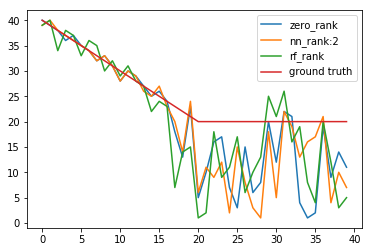

In [256]:
from scipy.stats import rankdata

methods = ['zero_rank', 'nn_rank:2', 'rf_rank']
for method in methods:
    _, ranks = torch.load('../results/CorrelatedInteractionSimulation/0111-%s-nn_test_zero.pth' % method)
    plt.plot(rankdata(ranks[0]), label=method)
plt.plot(gnd_truth_rank + 20, label='ground truth')
plt.legend()

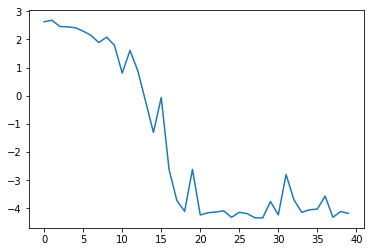

In [133]:
_, ranks = torch.load('../results/CorrelatedInteractionSimulation/0111-%s-nn_test_zero.pth' % 'nn_rank:1')
plt.plot(ranks[0])

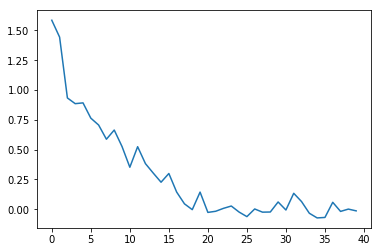

In [130]:
_, ranks = torch.load('../results/CorrelatedInteractionSimulation/0111-%s-nn_test_zero.pth' % 'zero_rank')
plt.plot(ranks[0])

## Interaction

In [3]:
gnd_truth_rank = np.zeros((40,))
for i in range(0, 20, 2):
    gnd_truth_rank[i:(i+2)] = (20 - i)
def create_df(top_features=40):
    arr = []
    methods = [
        'nn_rank:0.05', 'nn_rank:0.1', 'nn_rank:0.5', 
#         'nn_middle_rank:0.001','nn_middle_rank:0.01', 'nn_middle_rank:0.1', 'nn_middle_rank:0.5', 'nn_middle_rank:1',
        'nn_rank:1', 'rf_rank', 
        'enet_rank', 'lasso_rank', 'zero_rank', 'shuffle_rank', 'dfs_rank:1', 'marginal_rank'
    ]
    for method in methods:
        _, ranks = torch.load('../results/InteractionSimulation/0111-%s-nn_test_zero.pth' % method)
        arr.append([spearmanr(gnd_truth_rank[:top_features], ranks[i][:top_features]).correlation for i in range(5)])
    df = pd.DataFrame(arr)
    df.index = methods
    df['std_corr'] = df[[0, 1, 2, 3, 4]].std(axis=1)
    df['mean_corr'] = ((df[0] + df[1] + df[2] + df[3] + df[4]) / 5)
    return df

In [331]:
# df['std_corr'] = df[[0, 1, 2, 3, 4]].std(axis=1)
df_40 = create_df(top_features=40)
df_20 = create_df(top_features=20)
df_15 = create_df(top_features=15)
df_10 = create_df(top_features=10)
df_5 = create_df(top_features=5)

df_40['20_corr'] = df_20['mean_corr']
df_40['20_corr_std'] = df_20['std_corr']
df_40['15_corr'] = df_15['mean_corr']
df_40['15_corr_std'] = df_15['std_corr']
df_40['10_corr'] = df_10['mean_corr']
df_40['10_corr_std'] = df_10['std_corr']
df_40['5_corr'] = df_5['mean_corr']
df_40['5_corr_std'] = df_5['std_corr']

In [332]:
df_40.to_csv('inter.csv')

In [333]:
df_40

,0,1,2,3,4,std_corr,mean_corr,20_corr,20_corr_std,15_corr,15_corr_std,10_corr,10_corr_std,5_corr,5_corr_std
nn_rank:0.05,0.912164,0.898118,0.921996,0.903335,0.857988,0.024512,0.898720,0.988988,0.005484,0.983667,0.014012,0.984732,0.000000,0.948683,0.000000
nn_rank:0.1,0.908753,0.893704,0.905743,0.905542,0.855781,0.022077,0.893905,0.989592,0.003936,0.987980,0.012858,0.984732,0.000000,0.948683,0.000000
nn_rank:0.5,0.910960,0.882267,0.902332,0.905141,0.866215,0.018635,0.893383,0.987781,0.005400,0.981870,0.013423,0.984732,0.000000,0.948683,0.000000
nn_rank:1,0.916578,0.907348,0.921996,0.916177,0.881865,0.015942,0.908793,0.989592,0.003936,0.986902,0.005146,0.984732,0.000000,0.948683,0.000000
rf_rank,0.921394,0.912565,0.896914,0.886681,0.904138,0.013468,0.904338,0.982950,0.011614,0.969651,0.022140,0.925648,0.056676,0.885438,0.141421
enet_rank,-0.077771,-0.307399,0.021173,0.027201,-0.028997,0.137669,-0.073159,-0.129792,0.141633,-0.190127,0.100533,-0.403980,0.216432,0.189737,0.386580
lasso_rank,-0.077771,-0.307399,0.021173,0.027201,-0.028396,0.137717,-0.073038,-0.128895,0.141719,-0.190127,0.100533,-0.403980,0.216432,0.189737,0.386580
zero_rank,0.923200,0.898520,0.929821,0.907750,0.890694,0.016407,0.909997,0.990196,0.002135,0.987980,0.009372,0.984732,0.000000,0.948683,0.000000
shuffle_rank,0.913167,0.898520,0.914170,0.911361,0.865011,0.020789,0.900446,0.988384,0.002700,0.984745,0.008036,0.984732,0.000000,0.948683,0.000000
dfs_rank:1,0.891697,0.886882,0.918785,0.902332,0.858790,0.022096,0.891697,0.958196,0.005484,0.916820,0.008274,0.802557,0.044721,0.453260,0.265100


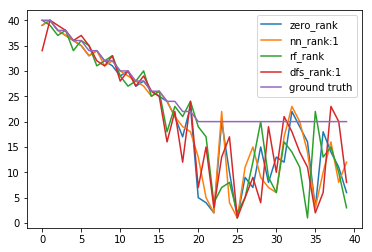

In [261]:
from scipy.stats import rankdata

methods = ['zero_rank', 'nn_rank:1', 'rf_rank', 'dfs_rank:1']
for method in methods:
    _, ranks = torch.load('../results/InteractionSimulation/0111-%s-nn_test_zero.pth' % method)
    plt.plot(rankdata(ranks[0]), label=method)
plt.plot(gnd_truth_rank + 20, label='ground truth')
plt.legend()

smallest length of dictionary: 0 with length 5


/home/zzzace2000/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


Text(0.5,0,'')

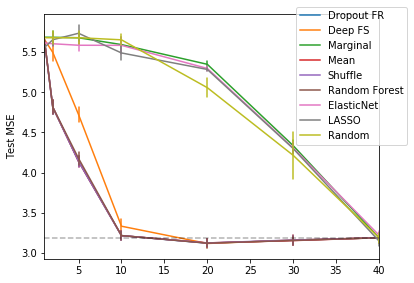

In [4]:
the_container = sum_all_container_by_filenames([
    "0111-nn_rank:1-nn_test_zero.pth",
    "0111-rf_rank-nn_test_zero.pth",
    "0111-zero_rank-nn_test_zero.pth",
    "0111-shuffle_rank-nn_test_zero.pth",
    "0111-marginal_rank-nn_test_zero.pth",
    "0111-dfs_rank:1-nn_test_zero.pth",
    "0111-random_rank-nn_test_zero.pth",
    "0111-enet_rank-nn_test_zero.pth",
    "0111-lasso_rank-nn_test_zero.pth",
], dataset='InteractionSimulation')

the_container.set_names('Test MSE', 'Number of features', 'Methods')
fig, ax = plt.subplots(figsize=(6, 4.5))
fig, ax = plot_figs(the_container, 'nn_test_zero_loss', ax=ax, fig=fig)
# ax.get_legend().set_visible(False)
plt.legend(bbox_to_anchor=(1.1, 1.05))
# ax.set_xlim(0, 90)
ax.set_xlabel('')
# fig.savefig('YearMSD_zero.eps', format='eps', dpi=300, bbox_inches='tight')
# fig.savefig('legend.eps', format='eps', dpi=300, bbox_inches='tight')

smallest length of dictionary: 0 with length 5


/home/zzzace2000/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


Text(0.5,0,'')

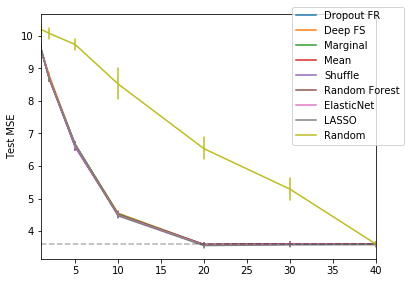

In [5]:
the_container = sum_all_container_by_filenames([
    "0111-nn_rank:0.5-nn_test_zero.pth",
    "0111-rf_rank-nn_test_zero.pth",
    "0111-zero_rank-nn_test_zero.pth",
    "0111-shuffle_rank-nn_test_zero.pth",
    "0111-marginal_rank-nn_test_zero.pth",
    "0111-dfs_rank:0.5-nn_test_zero.pth",
    "0111-random_rank-nn_test_zero.pth",
    "0111-enet_rank-nn_test_zero.pth",
    "0111-lasso_rank-nn_test_zero.pth",
], dataset='NoInteractionSimulation')

the_container.set_names('Test MSE', 'Number of features', 'Methods')
fig, ax = plt.subplots(figsize=(6, 4.5))
fig, ax = plot_figs(the_container, 'nn_test_zero_loss', ax=ax, fig=fig)
# ax.get_legend().set_visible(False)
plt.legend(bbox_to_anchor=(1.1, 1.05))
# ax.set_xlim(0, 90)
ax.set_xlabel('')
# fig.savefig('YearMSD_zero.eps', format='eps', dpi=300, bbox_inches='tight')
# fig.savefig('legend.eps', format='eps', dpi=300, bbox_inches='tight')

smallest length of dictionary: 0 with length 5


/home/zzzace2000/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


Text(0.5,0,'')

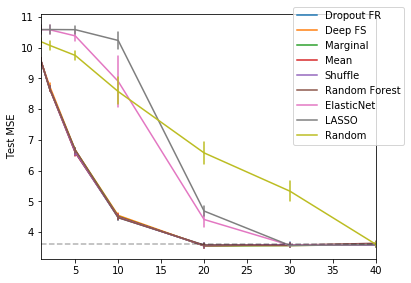

In [11]:
the_container = sum_all_container_by_filenames([
    "0111-nn_rank:0.5-nn_test_retrain.pth",
    "0111-rf_rank-nn_test_retrain.pth",
    "0111-zero_rank-nn_test_retrain.pth",
    "0111-shuffle_rank-nn_test_retrain.pth",
    "0111-marginal_rank-nn_test_retrain.pth",
    "0111-dfs_rank:0.5-nn_test_retrain.pth",
    "0111-random_rank-nn_test_retrain.pth",
    "0111-enet_rank-nn_test_retrain.pth",
    "0111-lasso_rank-nn_test_retrain.pth",
], dataset='NoInteractionSimulation')

the_container.set_names('Test MSE', 'Number of features', 'Methods')
fig, ax = plt.subplots(figsize=(6, 4.5))
fig, ax = plot_figs(the_container, 'nn_test_retrain_loss', ax=ax, fig=fig)
# ax.get_legend().set_visible(False)
plt.legend(bbox_to_anchor=(1.1, 1.05))
# ax.set_xlim(0, 90)
ax.set_xlabel('')
# fig.savefig('YearMSD_retrain.eps', format='eps', dpi=300, bbox_inches='tight')
# fig.savefig('legend.eps', format='eps', dpi=300, bbox_inches='tight')

smallest length of dictionary: 0 with length 5


/home/zzzace2000/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


Text(0.5,0,'')

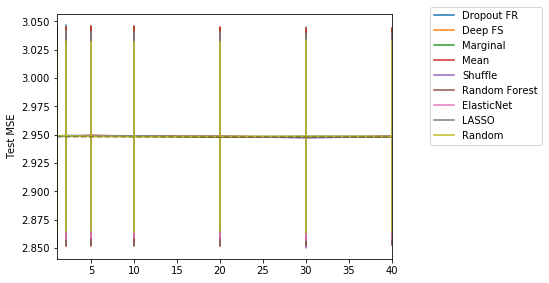

In [31]:
the_container = sum_all_container_by_filenames([
    "0111-nn_rank:0.5-nn_test_zero.pth",
    "0111-rf_rank-nn_test_zero.pth",
    "0111-zero_rank-nn_test_zero.pth",
    "0111-shuffle_rank-nn_test_zero.pth",
    "0111-marginal_rank-nn_test_zero.pth",
    "0111-dfs_rank:0.1-nn_test_zero.pth",
    "0111-random_rank-nn_test_zero.pth",
    "0111-enet_rank-nn_test_zero.pth",
    "0111-lasso_rank-nn_test_zero.pth",
], dataset='MoreInteractionSimulation')

the_container.set_names('Test MSE', 'Number of features', 'Methods')
fig, ax = plt.subplots(figsize=(6, 4.5))
fig, ax = plot_figs(the_container, 'nn_test_zero_loss', ax=ax, fig=fig)
# ax.get_legend().set_visible(False)
plt.legend(bbox_to_anchor=(1.1, 1.05))
# ax.set_xlim(0, 90)
ax.set_xlabel('')
# fig.savefig('YearMSD_zero.eps', format='eps', dpi=300, bbox_inches='tight')
# fig.savefig('legend.eps', format='eps', dpi=300, bbox_inches='tight')

In [7]:
for i in range(5):
    print(spearmanr(gnd_truth_rank[:20], ranks[i][:20]).correlation)

0.239401838301
0.232974943313
0.298047255066
0.256272437645
0.281176655723
